In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
model = "ada_boost"

In [3]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]

In [4]:
data_df = get_data(drop_columns=REMOVE, normalize=normalize)
x, y = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)

In [5]:
reg = regressor(**params)

In [6]:
preds = cross_val_predict(reg, x, y, cv=10, n_jobs=5)

In [7]:
data_df["predicao"] = preds

In [8]:
data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])

In [9]:
data_df[["paredao", "nome", "rejeicao", "predicao", "erro_absoluto"]].sort_values(by="erro_absoluto")

,paredao,nome,rejeicao,predicao,erro_absoluto
22,8,pyong,0.5170,0.507671,0.009329
9,7,babu,0.0460,0.063526,0.017526
42,13,thelma,0.3653,0.383858,0.018558
4,6,guilherme,0.5607,0.540400,0.020300
10,7,manu_gavassi,0.1018,0.080362,0.021438
20,8,babu,0.4771,0.507671,0.030571
2,17,thelma,0.3141,0.353667,0.039567
7,5,flayslene,0.1764,0.134929,0.041471
39,1,bianca_andrade,0.2446,0.202900,0.041700
14,10,manu_gavassi,0.4251,0.469487,0.044387


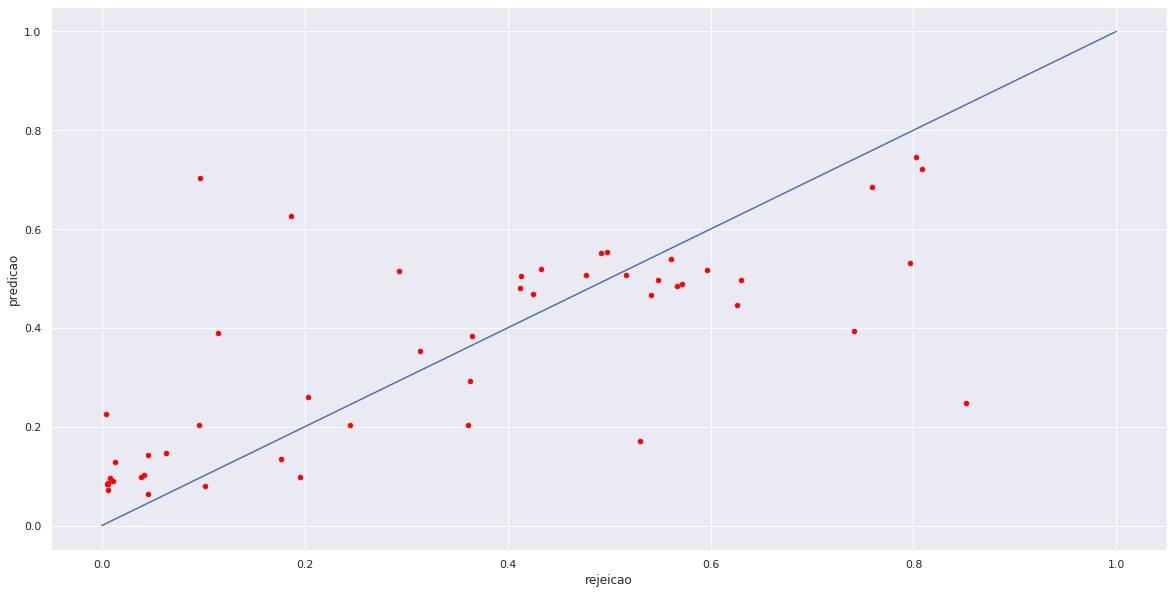

In [10]:
data_df.plot.scatter(x="rejeicao", y="predicao", c="red")
plt.plot([0,1],[0,1])

In [11]:
y_real = data_df["rejeicao"].values
pred = data_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.03360109418996894
mae: 0.12539435659172266
r2: 0.5223824319390983
